First, generate a random model

In [12]:
import numpy as np
import pylab as plt
from bioscrape.simulator import *
from bioscrape.types import *
import warnings


#Parameter ranges to randomly choose parameters (on a log scale)
param_min = -2
param_max = 2

#Names of different supported propensities
propensity_types = ['massaction', 'hillpositive', 'proportionalhillpositive', 'hillnegative', 'proportionalhillnegative', 'massaction']#, 'general']

#parameter names required for each propensity (general will be treated by itself)
propensity_param_requirements = {
	'massaction':['k'], 'hillpositive':['k', 'K', 'n'], 'hillnegative':['k', 'K', 'n'],
	'proportionalhillpositive':["k", "K", "n"], 'proportionalhillnegative':["k", "K", "n"]
}
#species (passed in as parameters) requires for each propensity (general will be treated by itself)
propensity_specie_requirements = {
	'hillpositive':['s1'], 'hillnegative':['s1'], 'proportionalhillpositive':['s1', 'd'], 'proportionalhillnegative':['s1', 'd'], "massaction":[]
}


species = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
n_species = len(species)
n_reactions = np.random.randint(1, 3)

reactions = []
for r in range(n_reactions):

    try_again = True
    while try_again:#Loop ensures no positive feedback which leads to long simulations
        inputs = []
        outputs = []
        while(len(inputs) == 0 and len(outputs) == 0):

            n_inputs = np.random.randint(0, 5)
            for i in range(n_inputs):
                inputs.append(species[np.random.randint(0, len(species))])

            n_outputs = np.random.randint(0, 5)
            for i in range(n_outputs):
                outputs.append(species[np.random.randint(0, len(species))])

        inputs_in_outputs = len([i for i in inputs if i in outputs])
        if inputs_in_outputs >= len(inputs):
            try_again = True
        else:
            try_again = False

    prop_type = propensity_types[np.random.randint(0, len(propensity_types))]
    param_dict = {}
    if prop_type != 'general':
        required_params = propensity_param_requirements[prop_type]
        required_species = propensity_specie_requirements[prop_type]
        param_dict = {}
        for p in required_params:
            param_dict[p] = round(np.exp(np.random.uniform(low = param_min, high = param_max)), 3)
        for i in range(len(required_species)):
            k = required_species[i]
            param_dict[k] = species[np.random.randint(0, len(species))]

    elif prop_type == 'general': #Here we will use a random(ish) rational function
        rate_str = "(1+"
        numerator_terms = np.random.randint(0, 5)
        denominator_terms = np.random.randint(0, 5)
        for i in range(numerator_terms):
            coef = str(round(np.exp(np.random.uniform(low = param_min, high = param_max)), 3))
            exp = str(round(np.random.uniform(low = 0, high = param_max), 3))
            specie = species[np.random.randint(0, len(species))]
            rate_str += coef+"*"+specie+"^"+exp+"+"
        rate_str =  rate_str[:-1] + ")"
        rate_str += "/(1+"
        for i in range(denominator_terms):
            coef =str(round(np.exp(np.random.uniform(low = param_min, high = param_max)), 3))
            exp = str(round(np.random.uniform(low = 0, high = param_max), 3))
            specie = species[np.random.randint(0, len(species))]
            rate_str += coef+"*"+specie+"^"+exp+"+"
        rate_str =  rate_str[:-1] + ")"
        param_dict['rate'] = rate_str

    rxn = (inputs, outputs, prop_type, param_dict)
    reactions.append(rxn)


print("Bioscrape model #rxns=", len(reactions), "\nrxns=", reactions)
M = Model(species = species, reactions = reactions, initial_condition_dict = {s:np.random.randint(10, 100) for s in species})
M.write_sbml_model('random_model_sbml.xml')
M3 = Model(sbml_filename = 'random_model_sbml.xml')


Bioscrape model #rxns= 1 
rxns= [(['E', 'C'], [], 'hillnegative', {'k': 2.385, 'K': 0.951, 'n': 0.953, 's1': 'B'})]


In [ ]:
timepoints = np.arange(0, 1., .02)
results_1 = py_simulate_model(timepoints, Model = M, stochastic = False, safe = False)
print("first simulation successful")

results_2 = py_simulate_model(timepoints, Model = M2, stochastic = False, safe = False)
print("second simulation successful")

results_3 = py_simulate_model(timepoints, Model = M2, stochastic = False, safe = False)
print("third simulation successful")

plt.figure(figsize = (16, 6))
for s in species:
    plt.plot(timepoints, results_1[s], "-", label = "Model 1: "+s)
    plt.plot(timepoints, results_2[s], "o", label = "Model 2: "+s)
    plt.plot(timepoints, results_3[s], 'x', ms = 10, label = "Model 3: "+s)
plt.legend()
plt.show()
    

### Load an advanced SBML model (with local parameters, assignment and rate rules, and function definitions?)
Note that this is a model generated by MATLAB Simbiology and hence has weird species and parameter identifiers.

In [5]:
from bioscrape.types import *
from bioscrape.sbmlutil import import_sbml

In [6]:
M = import_sbml('models/GFP.xml')

C:\Users\apand\Anaconda3\lib\site-packages\bioscrape\sbmlutil.py:90: UserWarning: SBML model contains reversible reaction!
Please check rate expressions and ensure they are non-negative before doing stochastic simulations.
  'Please check rate expressions and ensure they are non-negative before doing '+


In [7]:
from bioscrape.simulator import py_simulate_model
timepoints = np.linspace(0,10000,100)

results = py_simulate_model(timepoints, Model = M)

C:\Users\apand\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
odeint failed with mxstep=500...

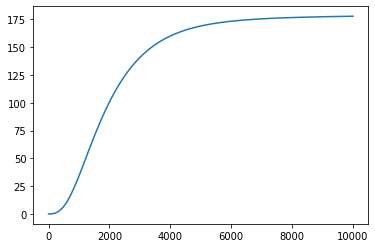

In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.plot(timepoints, results["mw6600ba7f_5b6d_4e5d_89a2_4d798f44476d"])